## Linear Regression

In [1]:
import os
import json
import pandas as pd 
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline, AutoModel
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import numpy as np



In [2]:
df = pd.read_csv('filtered_data_.csv')
df.drop(columns=["user_id", "review_id", "book_id"], inplace=True)
df = df.dropna(subset=['review_text'])
df = df[(df["rating"] != 0)] # remove reviews with no rating
df["review_text"] = df["review_text"].astype(str)
df

,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,type
0,4,Fun sequel to the original.,735919,735919,735079.8,735663.8,7,0,children
1,5,One of my favorite books to read to my 5 year ...,735545,736354,736353.0,735663.8,4,0,children
2,5,One of the best and most imaginative childrens...,735529,735529,735079.8,735663.8,6,1,children
3,5,My daughter is loving this. Published in the 6...,735204,736410,735079.8,735663.8,5,4,children
4,5,A friend sent me this. Hilarious!,734268,734531,734268.0,734268.0,5,0,children
...,...,...,...,...,...,...,...,...,...
39995,3,*3.5 stars*,735888,736092,735889.0,735888.0,26,2,young_adult
39996,3,Written in the Stars is actually a book I don'...,735792,736092,735793.0,735792.0,55,3,young_adult
39997,3,*2.5 stars* \n I originally rated this a 3.5 b...,735790,735827,735827.0,735819.0,25,7,young_adult
39998,3,*3.75 stars* \n I've never given that kind of ...,735778,735781,735781.0,735778.0,11,0,young_adult


(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

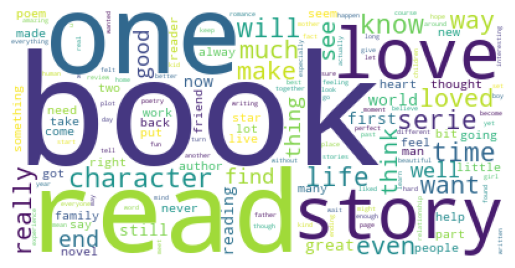

In [3]:
df5 = df[df.rating == 5]
text5 = ''
for line in df5.review_text:
    text5 += line + " "
wordcloud5 = WordCloud(background_color="white").generate(text5)
plt.imshow(wordcloud5)
plt.axis("off")

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

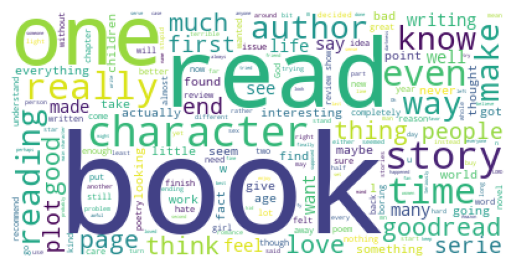

In [4]:
df1 = df[df.rating == 1]
text1 = ''
for line in df1.review_text:
    text1 += line + " "
wordcloud1 = WordCloud(background_color="white").generate(text1)
plt.imshow(wordcloud1)
plt.axis("off")

Best alpha: 1.00000
R^2 score: -12.13
RMSE: 3.63
Intercept: 3.73
Coefficient: [-0.0054128  -0.01943091 -0.00986245 ... -0.00860466  0.01488701
  0.00038334]
Mean Squared Error:  13.210745892363935
Prediction [4.05872461 8.87765991 1.18788227 ... 5.85170651 4.22565394 2.25018054]


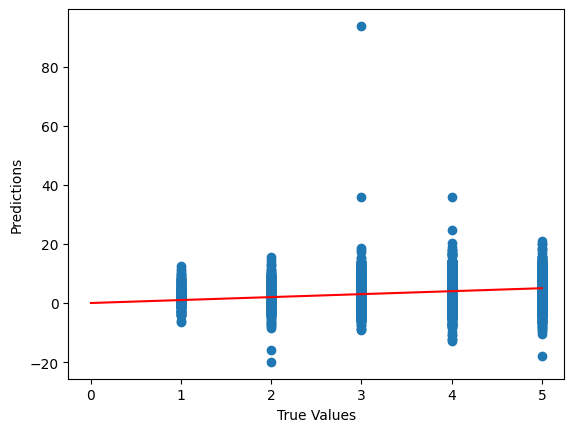

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import math

# Data Preprocessing
x = df['review_text']
y = df['rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature Engineering with TF-IDF Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=10, stop_words='english')
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

Y_train = np.array(y_train)
Y_test = np.array(y_test)

# Model Selection with Ridge Regression and GridSearchCV
pipeline = make_pipeline(StandardScaler(with_mean=False), Ridge())
param_grid = {'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)  # Use all available CPU cores
grid_search.fit(X_train, Y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
Y_pred = best_model.predict(X_test)

# Evaluation
mse = metrics.mean_squared_error(Y_test, Y_pred)
rmse = math.sqrt(mse)
intercept = best_model.named_steps['ridge'].intercept_
coef = best_model.named_steps['ridge'].coef_
print('Best alpha: %.5f' % grid_search.best_params_['ridge__alpha'])
print('R^2 score: %.2f' % best_model.score(X_test, Y_test))
print('RMSE: %.2f' % rmse)
print('Intercept: %.2f' % intercept)
print('Coefficient: %s' % coef)
print('Mean Squared Error: ', mse)
print('Prediction', Y_pred)

plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot([0, 5], [0, 5], 'r') 
plt.show()